# Dataset: Abnormal blood cells

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_pickle('BL_RL_N_malignanCells.pkl').dropna()
df.head()

,tipoCelula,entidad,historia,frotis,archivos,Hairiness,RBCproximity,Area_cel,EquivDiameter_cel,Eccentricity_cel,...,Gra_R_kurto_cyt,Gra_G_kurto_cyt,Gra_R_kurto_cel,Gra_G_kurto_cel,Pgra_R_kurto_nuc,Pgra_G_kurto_nuc,Pgra_R_kurto_cyt,Pgra_G_kurto_cyt,Pgra_R_kurto_cel,Pgra_G_kurto_cel
0,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988251.jpg,30,0.162759,14877,137.629883,0.636370,...,2.514249,2.510239,2.220790,2.359441,4.156459,3.887811,2.079814,2.272145,3.765465,3.975058
1,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988252.jpg,0,0.080415,8645,104.914994,0.407590,...,5.371937,4.301272,2.274587,1.908660,2.767560,2.370320,3.275449,3.677901,3.475912,3.286152
2,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988257.jpg,4,0.182350,17277,148.316417,0.734669,...,2.331373,2.248804,2.143897,2.283631,4.428359,4.107240,2.894253,3.615403,4.103185,4.413200
3,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988258.jpg,45,0.231731,17225,148.093049,0.744847,...,2.788552,2.383404,2.410256,2.460834,4.048826,3.627382,2.358728,3.380994,3.788008,3.962579
4,BL,LAM_MIELOMONOCITICA,244,2015-07-10,BL_12988260.jpg,17,0.176995,17804,150.561472,0.380513,...,2.009028,1.958559,2.338617,2.312970,4.532434,4.203701,2.467091,3.286795,4.117840,4.336945


## Análisis exploratorio

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8830 entries, 0 to 9104
Columns: 219 entries, tipoCelula to Pgra_G_kurto_cel
dtypes: float64(211), int64(4), object(4)
memory usage: 14.8+ MB


In [4]:
df.describe()

,historia,Hairiness,RBCproximity,Area_cel,EquivDiameter_cel,Eccentricity_cel,Perimeter_cel,Solidity_cel,Extent_cel,circularity_cel,...,Gra_R_kurto_cyt,Gra_G_kurto_cyt,Gra_R_kurto_cel,Gra_G_kurto_cel,Pgra_R_kurto_nuc,Pgra_G_kurto_nuc,Pgra_R_kurto_cyt,Pgra_G_kurto_cyt,Pgra_R_kurto_cel,Pgra_G_kurto_cel
count,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,...,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000
mean,140.463533,230.829105,0.193723,14543.366365,133.875736,0.473670,450.451249,0.961281,0.728378,0.891715,...,2.546200,2.468045,2.028470,2.036793,3.625292,3.363952,2.422204,3.051418,3.415272,3.667416
std,72.440179,1607.501102,0.160772,6304.389890,24.383270,0.173614,98.510159,0.041504,0.064209,0.120225,...,1.083817,1.172031,0.261782,0.265749,0.925776,0.988762,0.731864,0.851568,0.551874,0.643619
min,0.000000,0.000000,0.000000,2922.000000,60.995131,0.054761,233.466000,0.658270,0.399952,0.306219,...,1.124162,1.249429,1.248757,1.242563,1.122516,1.132266,1.280646,1.324308,1.343606,1.431216
25%,90.000000,34.000000,0.072715,10945.250000,118.050519,0.344757,386.322500,0.953247,0.702621,0.836866,...,1.983266,1.920022,1.881924,1.884360,3.092526,2.671026,1.949978,2.524700,3.171844,3.326943
50%,141.000000,90.000000,0.158196,13866.000000,132.871139,0.454023,438.751000,0.977769,0.748141,0.937057,...,2.304631,2.181208,2.033886,2.047064,3.806838,3.522017,2.262836,2.959470,3.528198,3.784906
75%,205.000000,203.000000,0.279094,16978.500000,147.029581,0.593060,497.891000,0.986991,0.771118,0.981978,...,2.759582,2.567252,2.183719,2.192845,4.323686,4.136061,2.703849,3.421208,3.794242,4.132380
max,269.000000,94003.000000,1.000000,130680.000000,407.905557,0.940866,1412.796000,1.000000,1.000000,1.018979,...,17.792242,16.980578,6.787077,5.424766,5.512604,5.638970,9.620911,14.710948,5.303913,5.226967


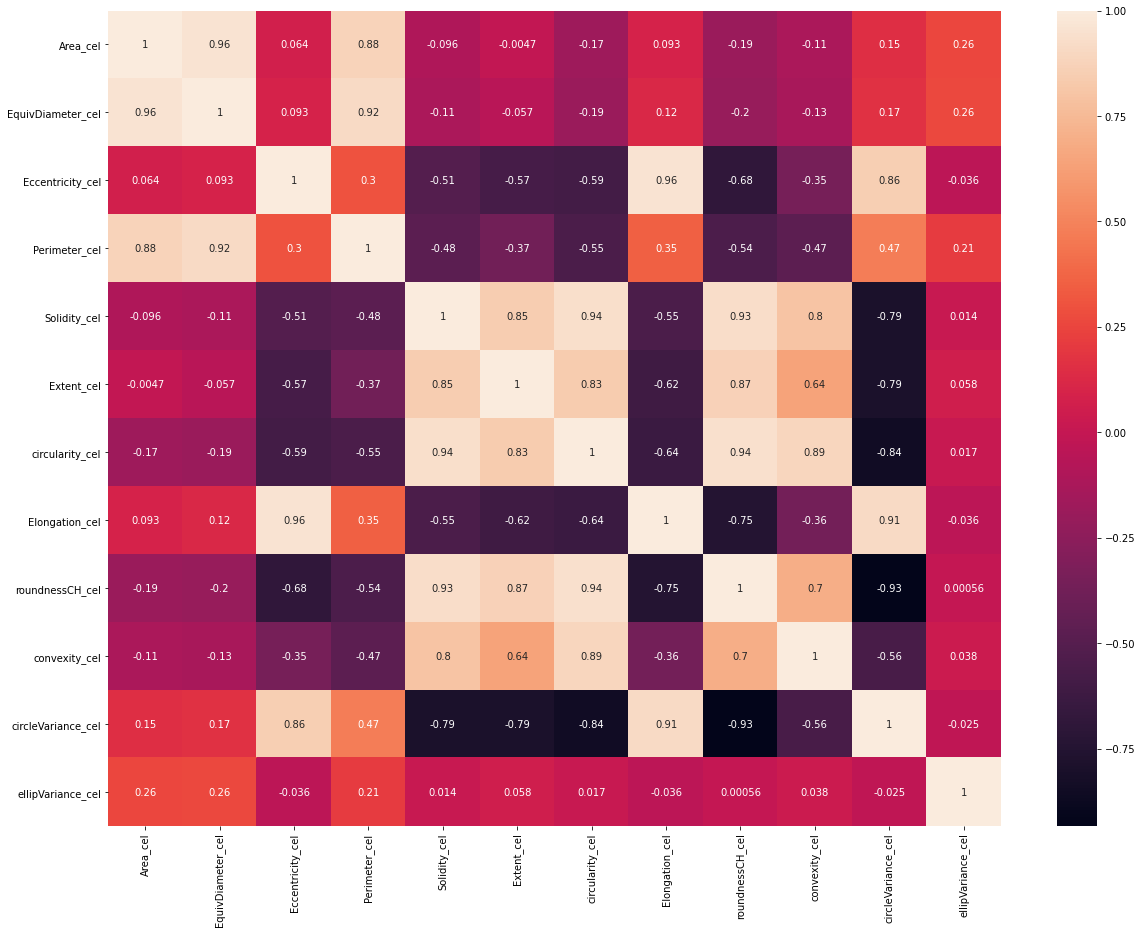

In [5]:
#variables que describen celula 
cel_info = df[['Area_cel','EquivDiameter_cel','Eccentricity_cel','Perimeter_cel','Solidity_cel','Extent_cel','circularity_cel','Elongation_cel','roundnessCH_cel','convexity_cel','circleVariance_cel','ellipVariance_cel']]
#correlacion
plt.subplots(figsize=(20,15))
sns.heatmap(cel_info.corr(), annot= True )

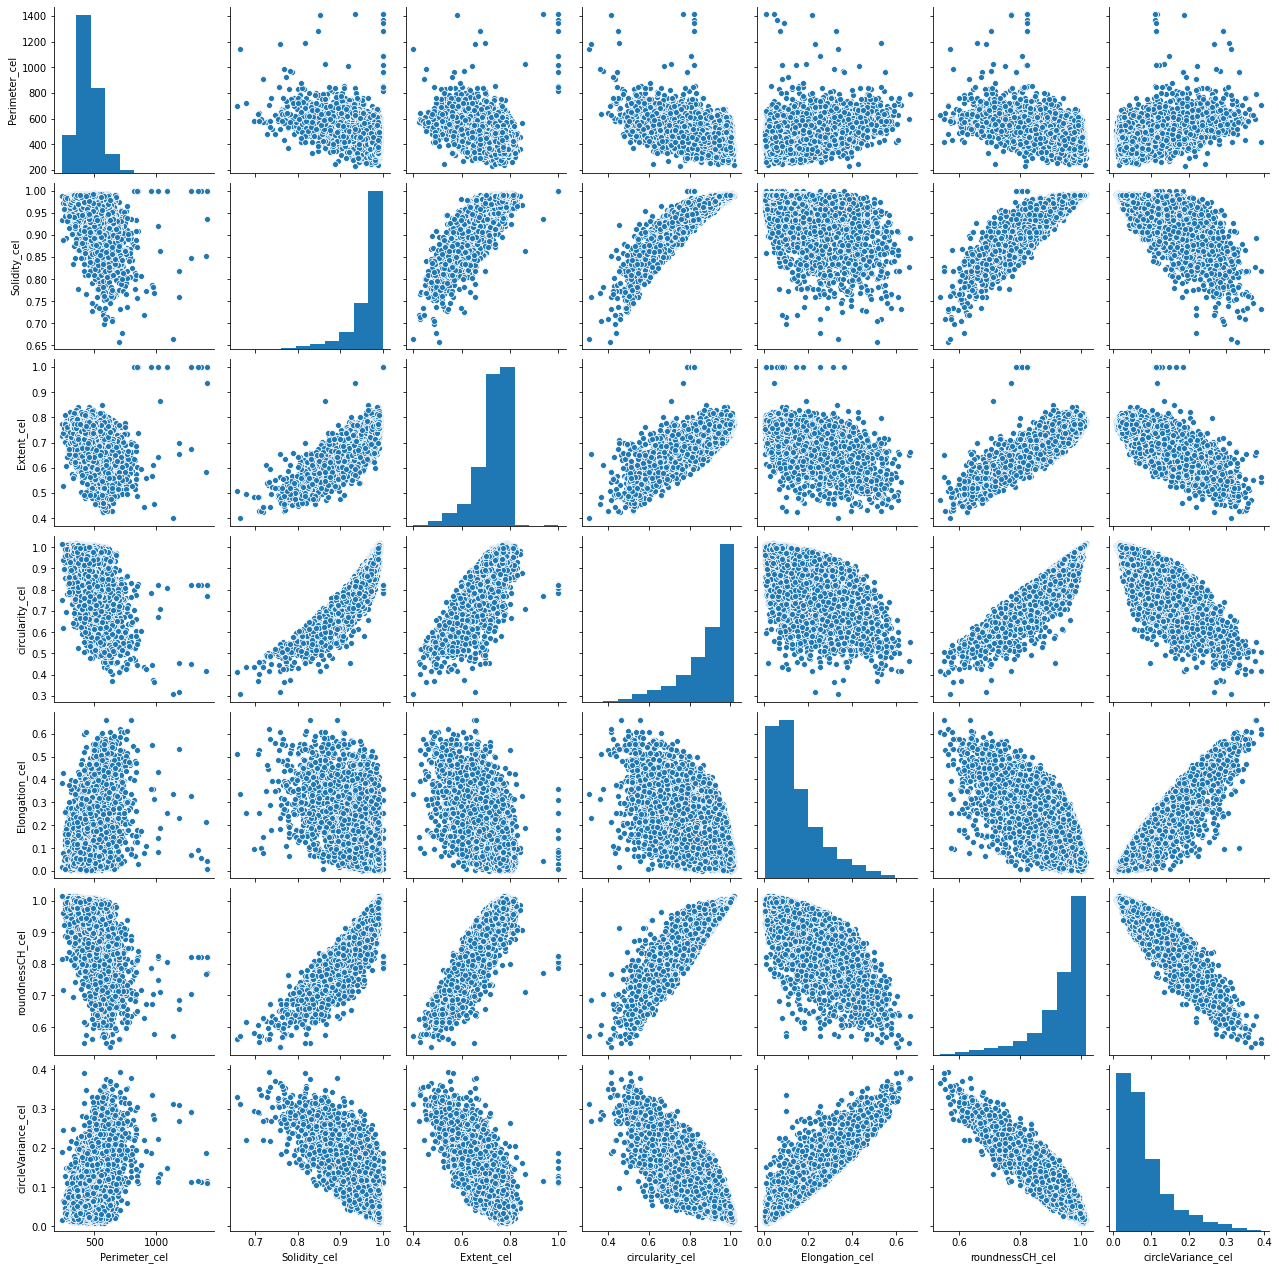

In [6]:
cel_info_red = df[['Perimeter_cel','Solidity_cel','Extent_cel','circularity_cel','Elongation_cel','roundnessCH_cel','circleVariance_cel']]#son las que mustran mayor correlacion

sns.pairplot(cel_info_red)

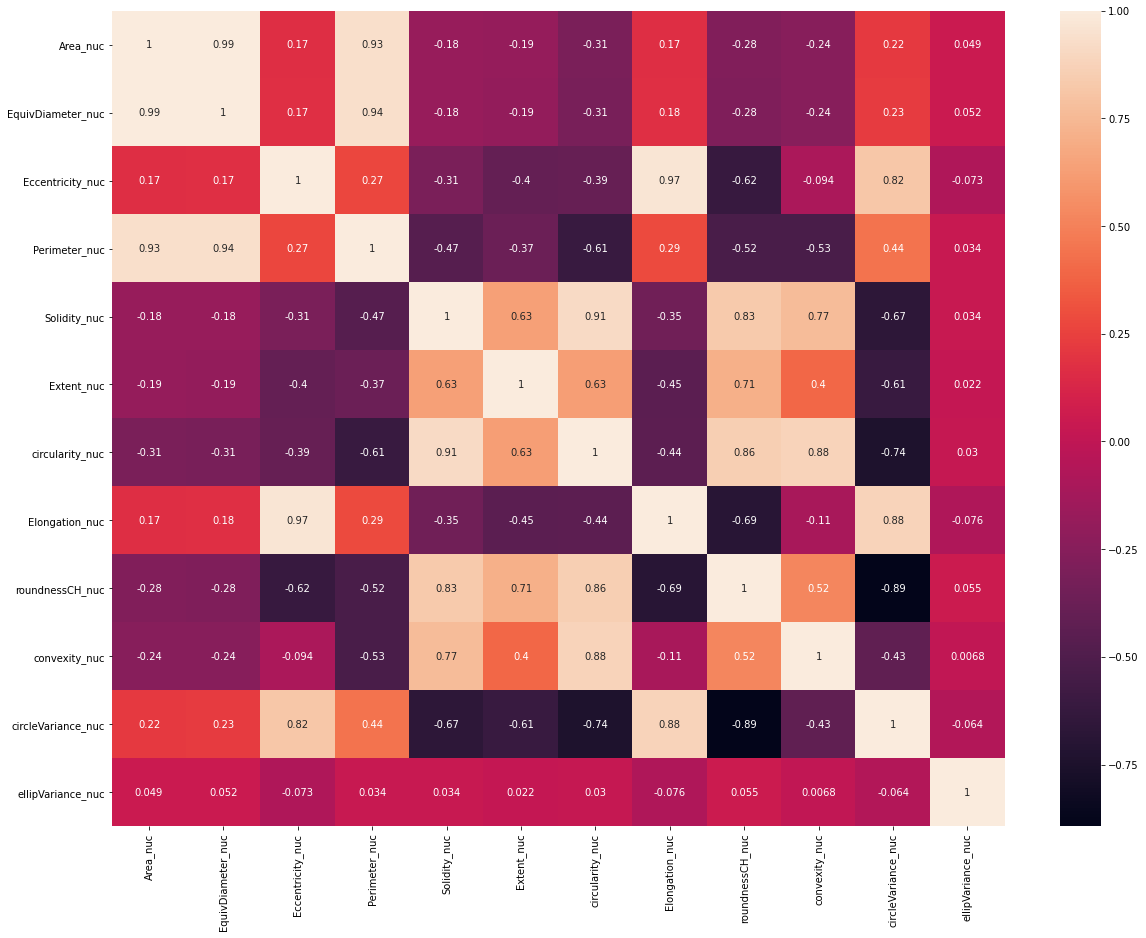

In [7]:
#variables que describen nucleo
nuc_info = df[['Area_nuc','EquivDiameter_nuc','Eccentricity_nuc','Perimeter_nuc','Solidity_nuc','Extent_nuc','circularity_nuc','Elongation_nuc','roundnessCH_nuc','convexity_nuc','circleVariance_nuc','ellipVariance_nuc']]
plt.subplots(figsize=(20,15))
#correlacion
sns.heatmap(nuc_info.corr(), annot= True )

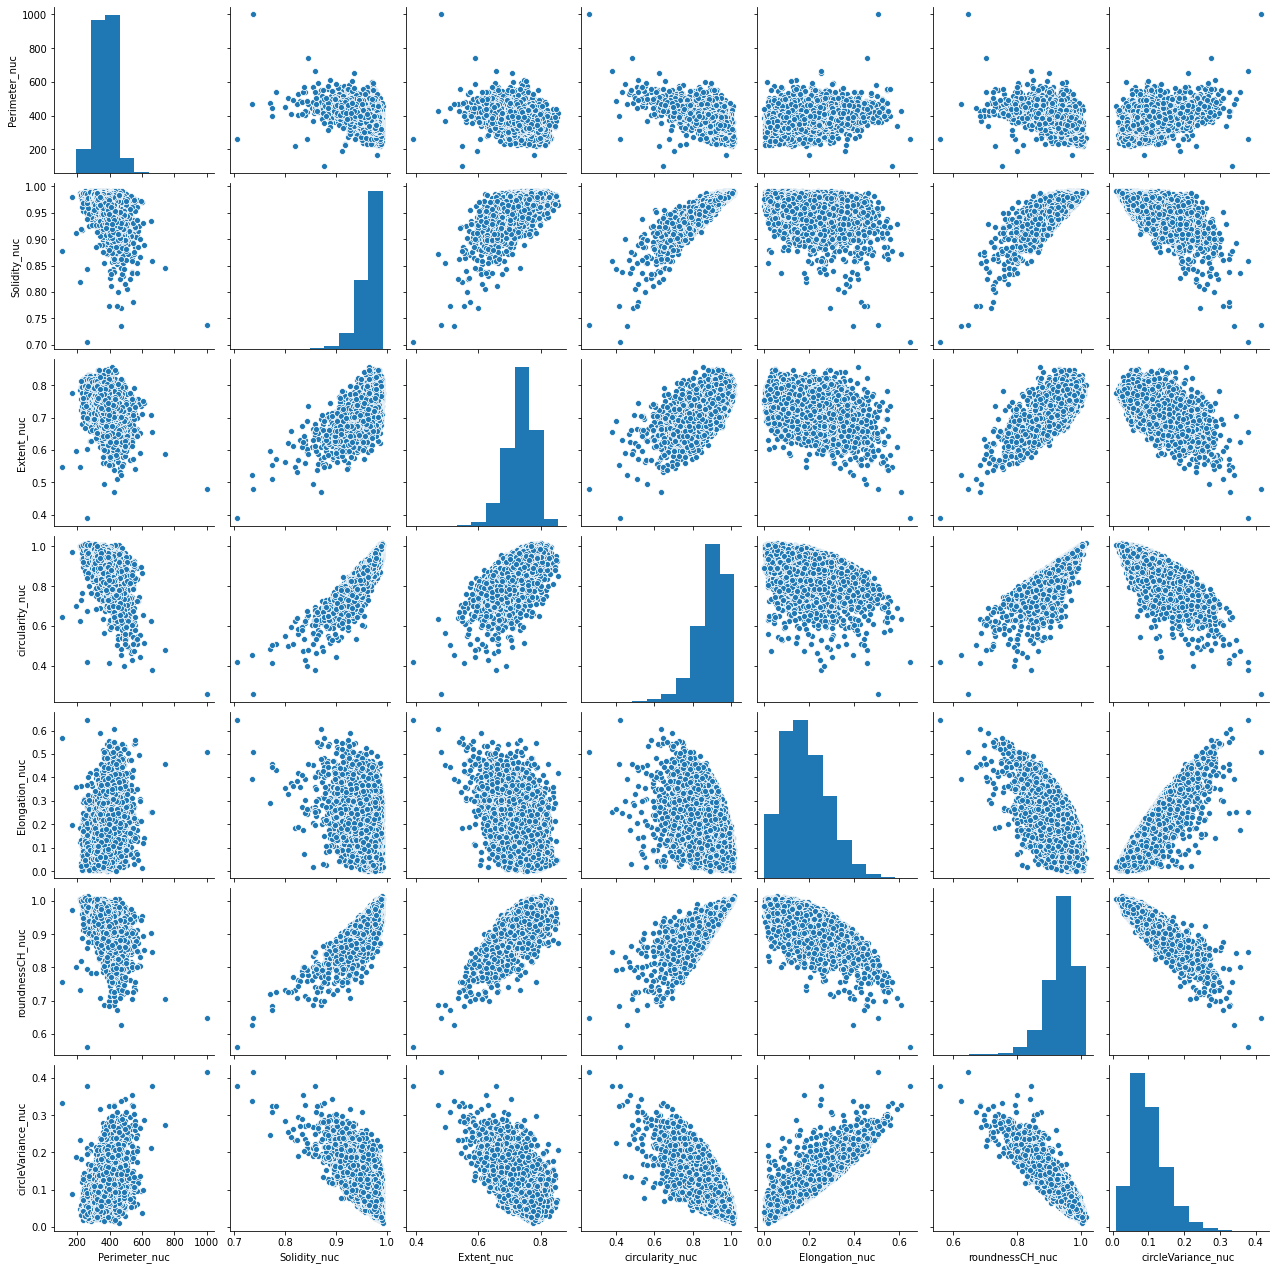

In [8]:
nuc_info_red = df[['Perimeter_nuc','Solidity_nuc','Extent_nuc','circularity_nuc','Elongation_nuc','roundnessCH_nuc','circleVariance_nuc']]#las que muestran mayor correlacion

sns.pairplot(nuc_info_red)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1221cc358>,
      dtype=object)

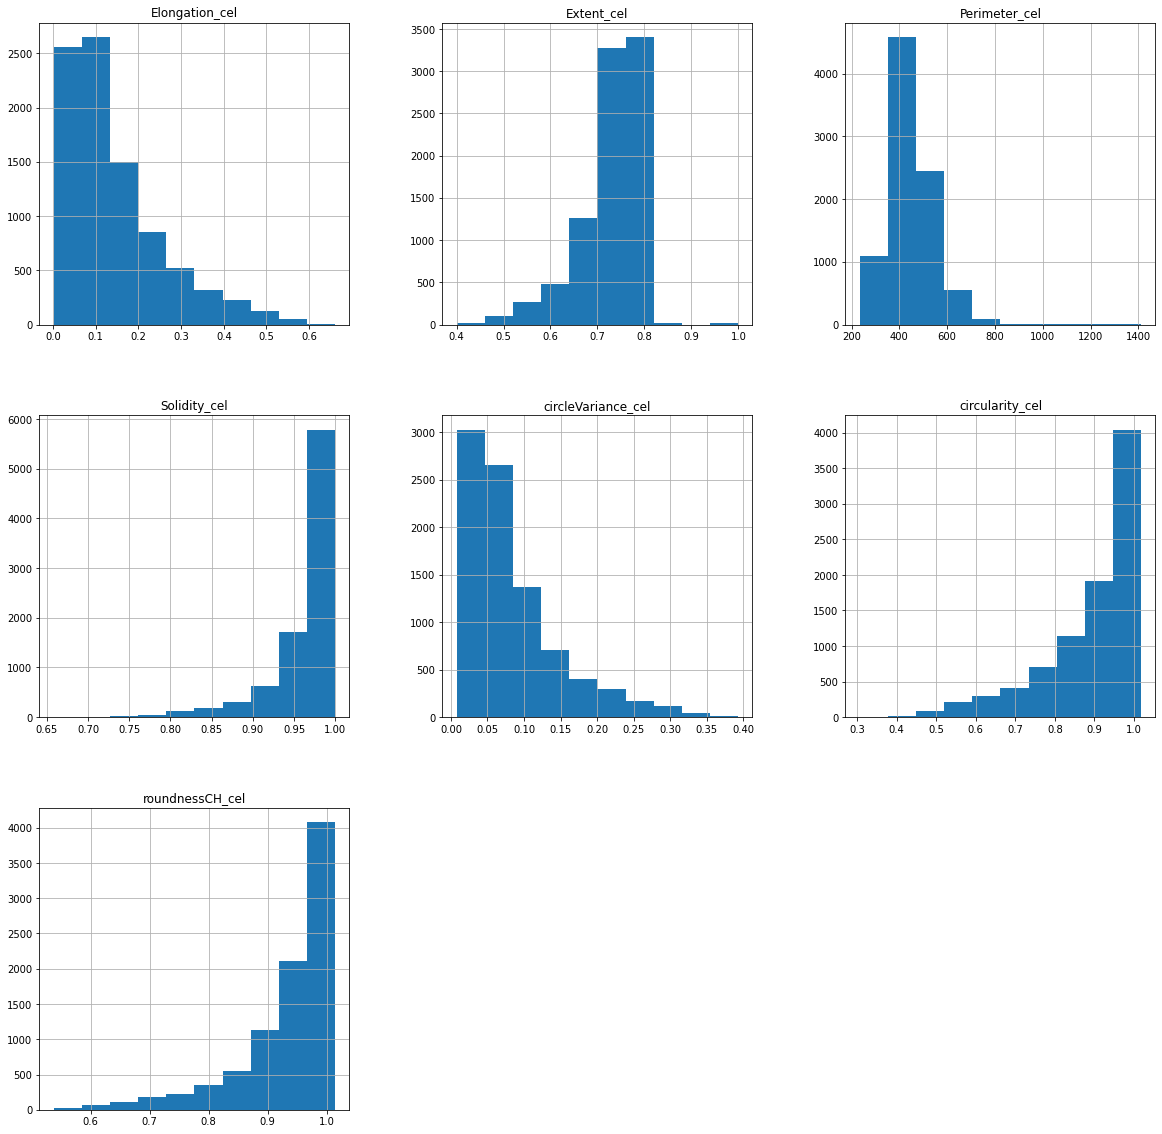

In [9]:
cel_info_red.hist(figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a0c278>,
      dtype=object)

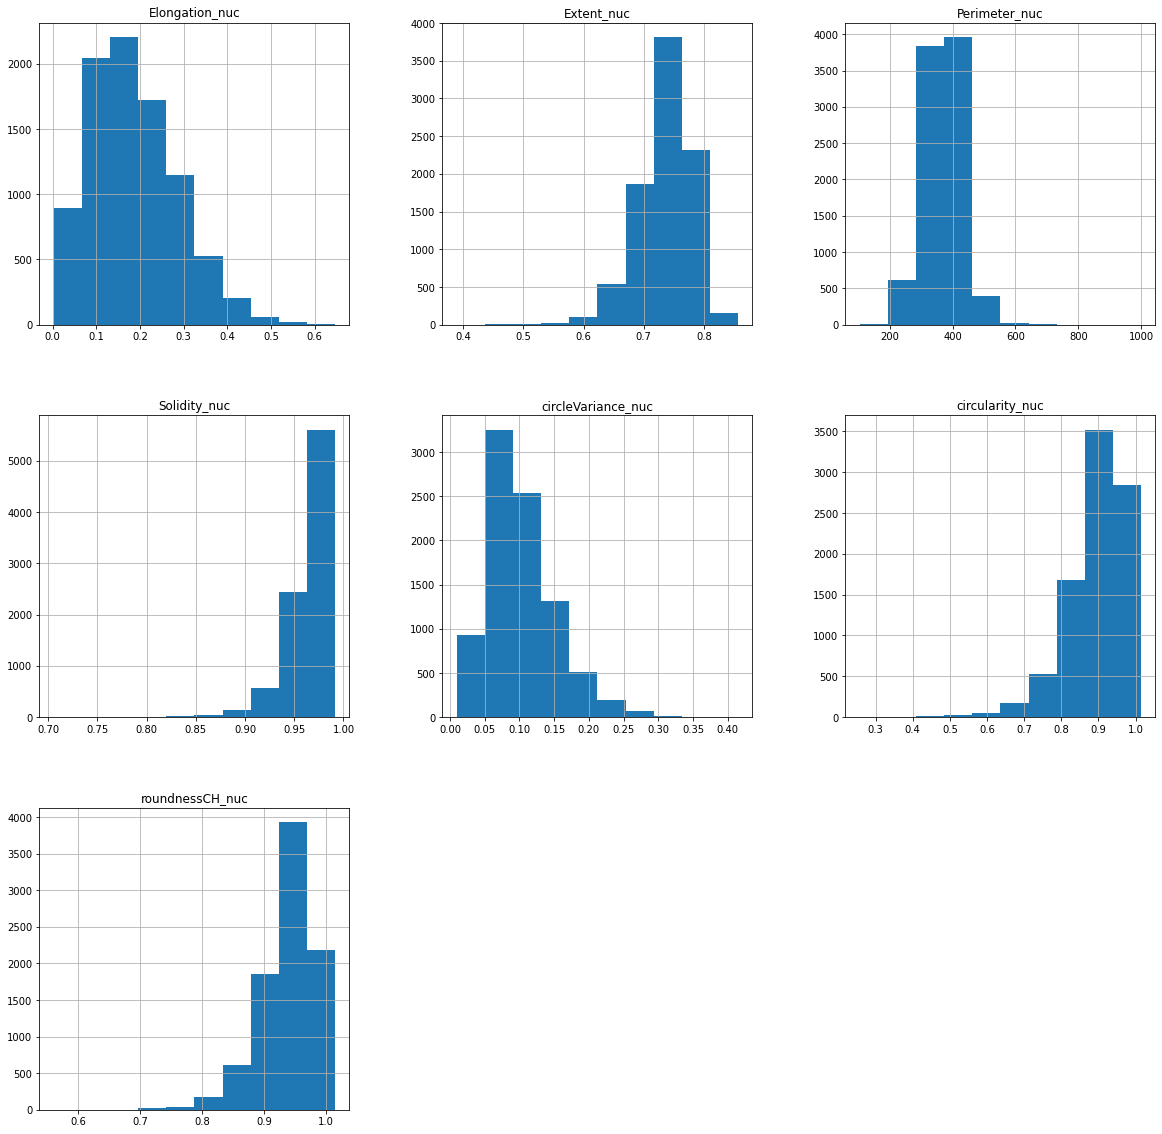

In [10]:
nuc_info_red.hist(figsize = (20,20))

## Clasificación con regresión logística y LDA

En primer lugar, se divide el dataset en training y testing. Se separan variable objetivo y descriptores en dos datasets.

In [11]:
X = df.drop(columns=['tipoCelula','entidad','historia','frotis','archivos'])
y = df['tipoCelula']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=43)

Se normalizan las variables de entrada, con `StandardScaler` del paquete `sklearn`.

In [12]:
norm = StandardScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

Encuentra los descriptores mas útiles para clasificar, según el p-value.

In [13]:
F,p = feature_selection.f_classif(X_train_norm, y_train)
relevancia_predictores = pd.DataFrame(np.array([F,p]).T,index=X_train.columns, columns=['F_value','p_value'])
predictores_importantes = list(relevancia_predictores[relevancia_predictores['p_value']<0.01].index)
print('Predictores con p-value cercano a 0:',len(predictores_importantes))

Predictores con p-value cercano a 0: 211


Como casi todos los descriptores aparentan ser relevantes, se empleará todo el dataset para realizar la clasificación.

Para la regresión logística, se prueban varios valores de la constante de regularización. Se escoge el mejor valor, y se evalua el modelo con validación cruzada de 10 iteraciones.

In [14]:
parametros = {'C':10**np.linspace(-3,3,20)}
modelo = LogisticRegression()
mejor_conf = GridSearchCV(modelo, parametros)
mejor_conf.fit(X_train_norm,y_train)
mejor_reglog = LogisticRegression(C=mejor_conf.best_params_['C'])
accuracies = cross_val_score(mejor_reglog, X_train_norm, y_train, cv=10, scoring="accuracy")
acc_reglog = accuracies.mean()

Para la clasificación con LDA, se prueban varios algoritmos para usar. Se escoge la mejor opción y se evalua el modelo con validación cruzada de 10 iteraciones.

In [15]:
parametros = {'solver':['svd', 'lsqr', 'eigen']}
modelo = LinearDiscriminantAnalysis()
mejor_conf = GridSearchCV(modelo, parametros)
mejor_conf.fit(X_train_norm,y_train)
mejor_lda = LinearDiscriminantAnalysis(solver=mejor_conf.best_params_['solver'])
accuracies = cross_val_score(mejor_lda, X_train_norm, y_train, cv=10, scoring="accuracy")
acc_lda = accuracies.mean()

Se comparan los modelos de regresión logística y LDA:

In [16]:
print("Accuracy para Regresión Logística:", acc_reglog)
print("Accuracy para LDA:", acc_lda)

Accuracy para Regresión Logística: 0.9715260023735954
Accuracy para LDA: 0.9710405654803915


En este caso, la regresión logística tiene un rendimiento ligeramente superior, aunque ambos modelos presentan resultados muy parecidos. A continuación, se evalúa el mejor modelo seleccionado sobre el conjunto de prueba:

Accuracy en conjunto de prueba: 0.9878660410936742


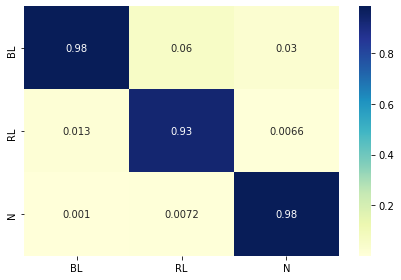

In [22]:
mejor_reglog.fit(X_train_norm,y_train)
y_pred = mejor_reglog.predict(X_test_norm)
CM = confusion_matrix(y_pred,y_test,labels=['BL','RL','N'])
CM = np.resize(CM,new_shape=[3,3])
CM = CM/np.sum(CM,axis=1) 
CM = pd.DataFrame(CM, index = ['BL','RL','N'], columns=['BL','RL','N'])
sns.heatmap(CM,annot=True,cmap = 'YlGnBu')
print('Accuracy en conjunto de prueba:',mejor_reglog.score(X_train_norm,y_train))
plt.tight_layout()
plt.show()

## Modelo de clasificación GLM

In [17]:
glm = LogisticRegression().fit(X_train_norm,y_train)
y_pred = glm.predict(X_test_norm)

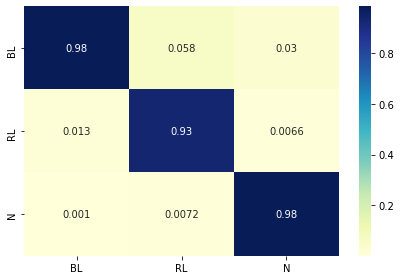

In [18]:
CM = confusion_matrix(y_pred,y_test,labels=['BL','RL','N'])
CM = np.resize(CM,new_shape=[3,3])
CM = CM/np.sum(CM,axis=1) 
CM = pd.DataFrame(CM, index = ['BL','RL','N'], columns=['BL','RL','N'])
sns.heatmap(CM,annot=True,cmap = 'YlGnBu')
plt.tight_layout()
plt.show()